In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
np.random.seed(0)
x = np.linspace(-10, 10, 10)
y = x*2 + 4 + np.random.randn(len(x))*2

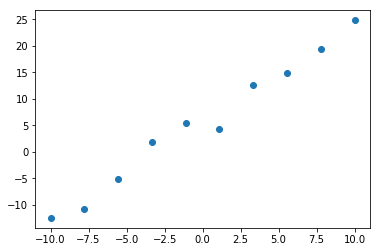

In [4]:
plt.scatter(x, y)

In [5]:
def cost(theta_0,  theta_1, x, y): 
    y_hat = theta_1*x + theta_0
    error = y-y_hat
    mse = np.mean(error**2)
    return mse

In [6]:
def cost_l(theta_0_mesh, theta_1_mesh, x, y):
    z = np.empty_like(theta_0_mesh)
    for i in range(len(theta_0_mesh)):
        for j in range(len(theta_1_mesh)):
            z[i, j] = cost(theta_0_mesh[i, j], theta_1_mesh[i, j], x, y)
    
    return z

In [7]:
theta_0_mesh, theta_1_mesh  = np.meshgrid(np.linspace(-10, 10, 200), np.linspace(-10, 10, 200))

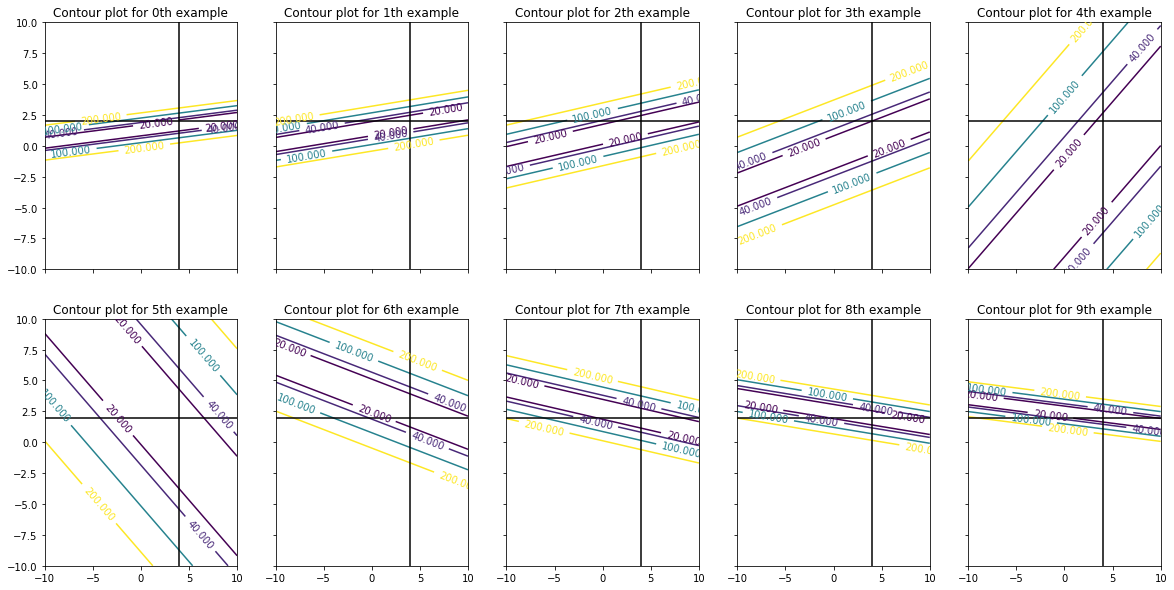

In [10]:
levels = [  20.0, 40.0, 100.0, 200.0]


fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(20, 10), sharex=True, sharey=True)
for r in range(2):
    for c in range(5):
        point_num = 5*r + c
        Z = cost_l(theta_0_mesh, theta_1_mesh, x[point_num:point_num+1], y[point_num:point_num+1])
        cp = ax[r, c].contour(theta_0_mesh, theta_1_mesh, Z, levels=levels )
        ax[r, c].axhline(y=2, color='k')
        ax[r, c].axvline(x=4, color='k')
        ax[r, c].clabel(cp, inline=True, 
         fontsize=10)
        ax[r, c].set_title("Contour plot for {}th example".format(point_num))





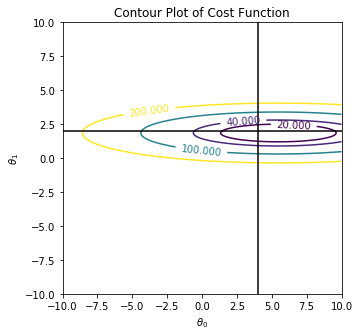

In [11]:

Z = cost_l(theta_0_mesh, theta_1_mesh, x, y)
plt.figure(figsize=(5, 5))
levels = [  20.0, 40.0, 100.0, 200.0]
cp = plt.contour(theta_0_mesh, theta_1_mesh, Z, levels=levels )


plt.clabel(cp, inline=True, 
         fontsize=10)
plt.title('Contour Plot of Cost Function')
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.axhline(y=2, color='k')
plt.axvline(x=4, color='k')